# Nelder-Mead Simplex 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)
import optimization.neldermead as nm
import optimization.functions as func

%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2
import time


In [2]:
#Choose optimization function
opt_func = func.parab_func

In [3]:
#Set parameters for optimization
alpha = 1;
beta = 0.5;
gamma = 2;
delta = 0.5;
TOL_FUNC = 1e-14;
MAX_ITER = 10000;
num_iter = 0;
opt_func = func.parab_func;

In [4]:
#Initial Guess
x0 = np.array([0.2,0.2])
x1 = np.array([0.3,0.2])
x2 = np.array([0.2,0.25])

#Factor 
factor = 10; 
ax_lim = factor/2; 

Initial Vertices:  [[2.  2. ]
 [3.  2. ]
 [2.  2.5]]


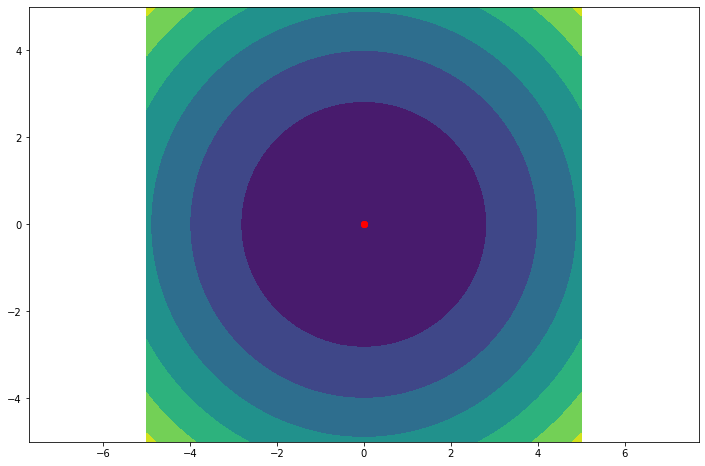

In [5]:
#Set up plotting 
points = np.array([x0,x1,x2])*factor
num_points = np.shape(points)[0]

print("Initial Vertices: ",points)

#Plotting parameters 
plot_simplex = 1; 
num_points = np.shape(points)[0]

xs = points[:,0]; xs = np.append(xs,points[0,0])
ys = points[:,1]; ys = np.append(ys,points[0,1])

xfunc = np.linspace(-ax_lim, ax_lim);
yfunc = np.linspace(-ax_lim, ax_lim);
zfunc = np.zeros((np.shape(yfunc)[0],np.shape(xfunc)[0]))

for i,x in enumerate(xfunc):
    for j,y in enumerate(yfunc):
        zfunc[j,i] = opt_func([x,y])
# plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
#ax = plt.gca(); 
plt.ion()
axes = plt.gca()
axes.set_xlim(-ax_lim, ax_lim)
axes.set_ylim(-ax_lim, ax_lim)
plt.contourf(xfunc,yfunc,zfunc);
plt.axis('equal')

conv = 0;
while (conv == 0):
    num_iter += 1;
    #Evaluate Points
    f = [];
    for point in points:
        f.append(opt_func(point))
    #Sort Points
    idx = np.argsort(f);
    #Best (l), Second Worst (s), Worst (h);
    f = np.array(f);
    f = f[idx];
    points = points[idx]
    fl = f[0]; xl = points[0]
    fs = f[-2]; xs = points[-2]
    fh = f[-1]; xh = points[-1]
    
    if (plot_simplex):
        #print("here")
        ax.clear() # - Clear
        axes = plt.gca()
        axes.set_xlim(-ax_lim, ax_lim)
        axes.set_ylim(-ax_lim, ax_lim)
        xs = np.array([xl[0],xs[0],xh[0],xl[0]]);
        ys = np.array([xl[1],xs[1],xh[1],xl[1]]);
        ax.plot(xs,ys,'r-o') 
        plt.axis('equal')
        plt.contourf(xfunc,yfunc,zfunc);
        fig.canvas.draw()   # draw
        time.sleep(0.5)  
        
    #Check Termination Criteria
    if (fl <= TOL_FUNC):
        conv = 1;
    if (num_iter >= MAX_ITER):
        conv = 1;

    #Compute Centroid
    centroid = np.zeros(num_points-1)
    for i in range(0,num_points-1):
        centroid += points[i];
    centroid /= (num_points-1);

    #Change Simplex
    #Reflect
    xr = centroid + alpha * (centroid-xh);
    fr = opt_func(xr);

    #Expand
    if (fr < fs):
        if (fr >= fl):
            #xh = xr;
            points[-1] = np.copy(xr);
            #Terminate Iteration
            continue;
        else:
            #Compute Expansion
            xe = centroid + gamma * (xr-centroid)
            fe = opt_func(xe);

            if (fe < fr):
                #xh = xe;
                points[-1] = np.copy(xe);
                #Terminate Iteration
                continue;
            else:
                #xh = xr;
                points[-1] = np.copy(xr);
                #Terminate Iteration
                continue;
            #ADD GREEDY EXPANSION LATER

    #Contraction
    if (fr >= fs):
        if (fr < fh):
            xc = centroid + beta*(xr-centroid);
            fc = opt_func(xc);
            if (fc <= fr):
                #xh = xc;
                points[-1] = np.copy(xc);
                #Terminate Iteration
                continue;
            else:
                #Shrink
                for i in range(1,num_points):
                    points[i] = xl + delta*(points[i]-xl);
                #Terminate Iteration
                continue;
        if (fr >= fh):
            xc = centroid + beta*(xh-centroid);
            fc = opt_func(xc);
            if (fc < fh):
                #xh = xc;
                points[-1] = np.copy(xc);
                #Terminate Iteration
                continue;
            else:
                #Shrink
                for i in range(1,num_points):
                    points[i] = xl + delta*(points[i]-xl);
                #Terminate Iteration
                continue;

In [6]:
print("Best Point: ", xl); 
print("Lowest Function Value: ", fl); 
print("Number of Iterations: ", num_iter); 

Best Point:  [-3.03289779e-08  7.95458318e-08]
Lowest Function Value:  7.247386251683957e-15
Number of Iterations:  58


In [7]:

%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


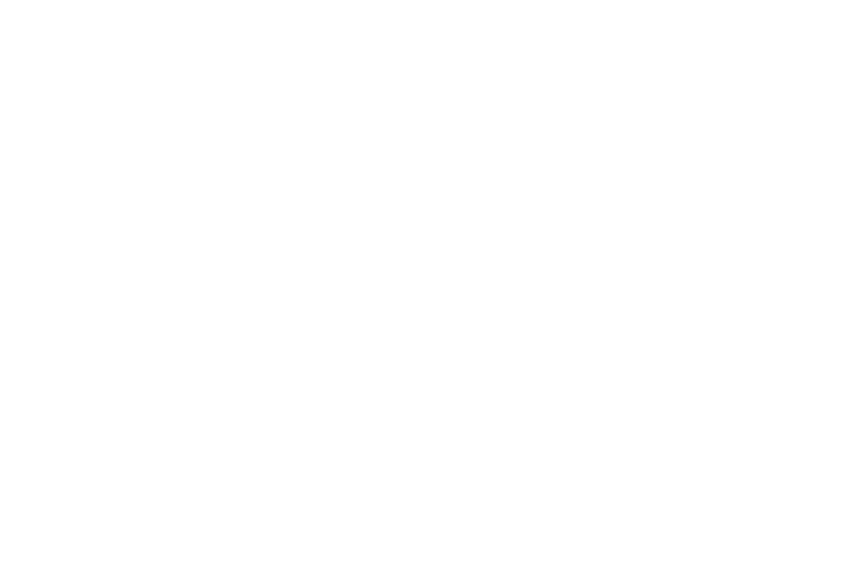

<IPython.core.display.Javascript object>


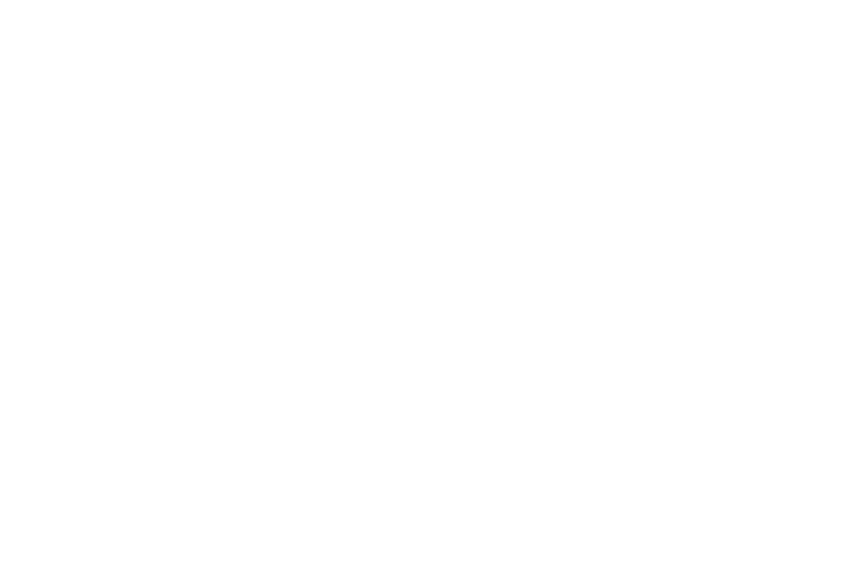

In [8]:
#initialise the graph and settings
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
axes = plt.gca()
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
fig.show()
fig.canvas.draw()
#Initial 
xs = np.array([0.2,0.3,0.2,0.2])
ys = np.array([0.2,0.2,0.25,0.2])

#iterate - plot, erase
for i in range(0,5):
    #print i
    ax.clear() # - Clear
    xs *= 0.9; 
    ys *= 0.9; 
    axes = plt.gca()
    axes.set_xlim(-1, 1)
    axes.set_ylim(-1, 1)
    ax.plot(xs,ys,'-o') 
    fig.canvas.draw()   # draw
    time.sleep(0.5)    #sleep
    
fig.show()